Logistic Regression

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [44]:
#download and save data
data = pd.read_csv(r'/home/user/Завантаження/Telegram Desktop/1.txt', header=None)
data.columns = ["first", "second","result"]
#результат першого і другого екзаменів і вступ чи не вступ(1 чи 0)
print(data.head())

       first     second  result
0  34.623660  78.024693       0
1  30.286711  43.894998       0
2  35.847409  72.902198       0
3  60.182599  86.308552       1
4  79.032736  75.344376       1


Text(0.5,1,'result')

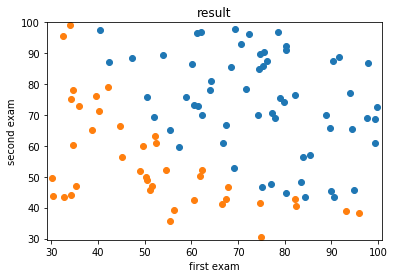

In [45]:
pos = np.nonzero(data['result'] == 1)
neg = np.nonzero(data['result'] == 0)
plt.figure(1)
plt.subplot(111)
plt.scatter(data['first'].iloc[pos],data['second'].iloc[pos])#розфарбовуємо в різні кольори здав/не здав
plt.scatter(data['first'].iloc[neg],data['second'].iloc[neg])
#plt.scatter(data['first'],data['second'])
plt.xlim(min(data['first'])-1,max(data['first'])+1)# межі графіка  
plt.ylim(min(data['second'])-1,max(data['second'])+1)
plt.xlabel('first exam')
plt.ylabel('second exam')
plt.title('result')

In [46]:
#split dataset
X = data.iloc[:,0:2]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [47]:
#обучаємо регресор
regressor = LogisticRegression(class_weight='balanced')
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

/home/user/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
theta = regressor.coef_
print(theta)

[[0.0317076  0.02035992]]


Text(0.5,1,'Predict')

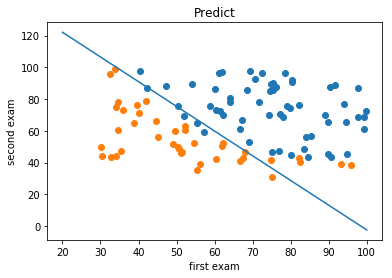

In [49]:
#plot decision boundary 
x = np.linspace(20,100, 50)
thet = []
thet.append(regressor.intercept_ .tolist()[0])
thet.append(theta[0][0])
thet.append(theta[0][1])
theta = thet
y = -((theta[0]+ theta[1]*x)/(theta[2]))
plt.scatter(data['first'].iloc[pos],data['second'].iloc[pos])
plt.scatter(data['first'].iloc[neg],data['second'].iloc[neg])
plt.plot(x,y)
plt.xlabel('first exam')
plt.ylabel('second exam')
plt.title('Predict')


Accuracy

In [18]:
from sklearn.metrics import f1_score
accuracy = float(f1_score(y_test, y_pred, average='weighted')*100)
print(accuracy)

94.11764705882352
